# The Lights Out Puzzle

**Lights out** is a famous puzzle game. The player is given a rectangular grid of lights which can be switched on and off. When you flip a switch inside one of those squares, it will toggle the on/off state of this and adjacent squares (up, down, left and right). Your goal is to turn all the lights off from a random starting light pattern.

## Example Puzzle

An example of the puzzle with 3 x 3 grid is shown in the figure below. The light squares are labelled from 0 to 8. We can represent the starting pattern using a list of numbers, where `1` represents lights switched on and `0` represnts ligths switched off. The list `lights` below represents the starting pattern in this example (squares 3, 5, 6, 7 are on and the rest are off):

```python
lights = [0, 0, 0, 1, 0, 1, 1, 1, 0]
```

The example puzzle can be solved by flipping the switches in square 0, 3 and 4 as illustrated step by step in the figure. If you play with it a little bit, you will soon notice **two important properties of this puzzle game**:

1. You don't need to flip a switch more than once.
2. The order of flipping doesn't matter.

Therefore, we can represent the puzzle solution as a list of numbers similar to the starting pattern. However, the meaning of `0` and `1` are different here:  `1` represents flipping a switch and `0` represents *not* flipping a switch. 

```python
solution = [1, 0, 0, 1, 1, 0, 0, 0, 0]
```

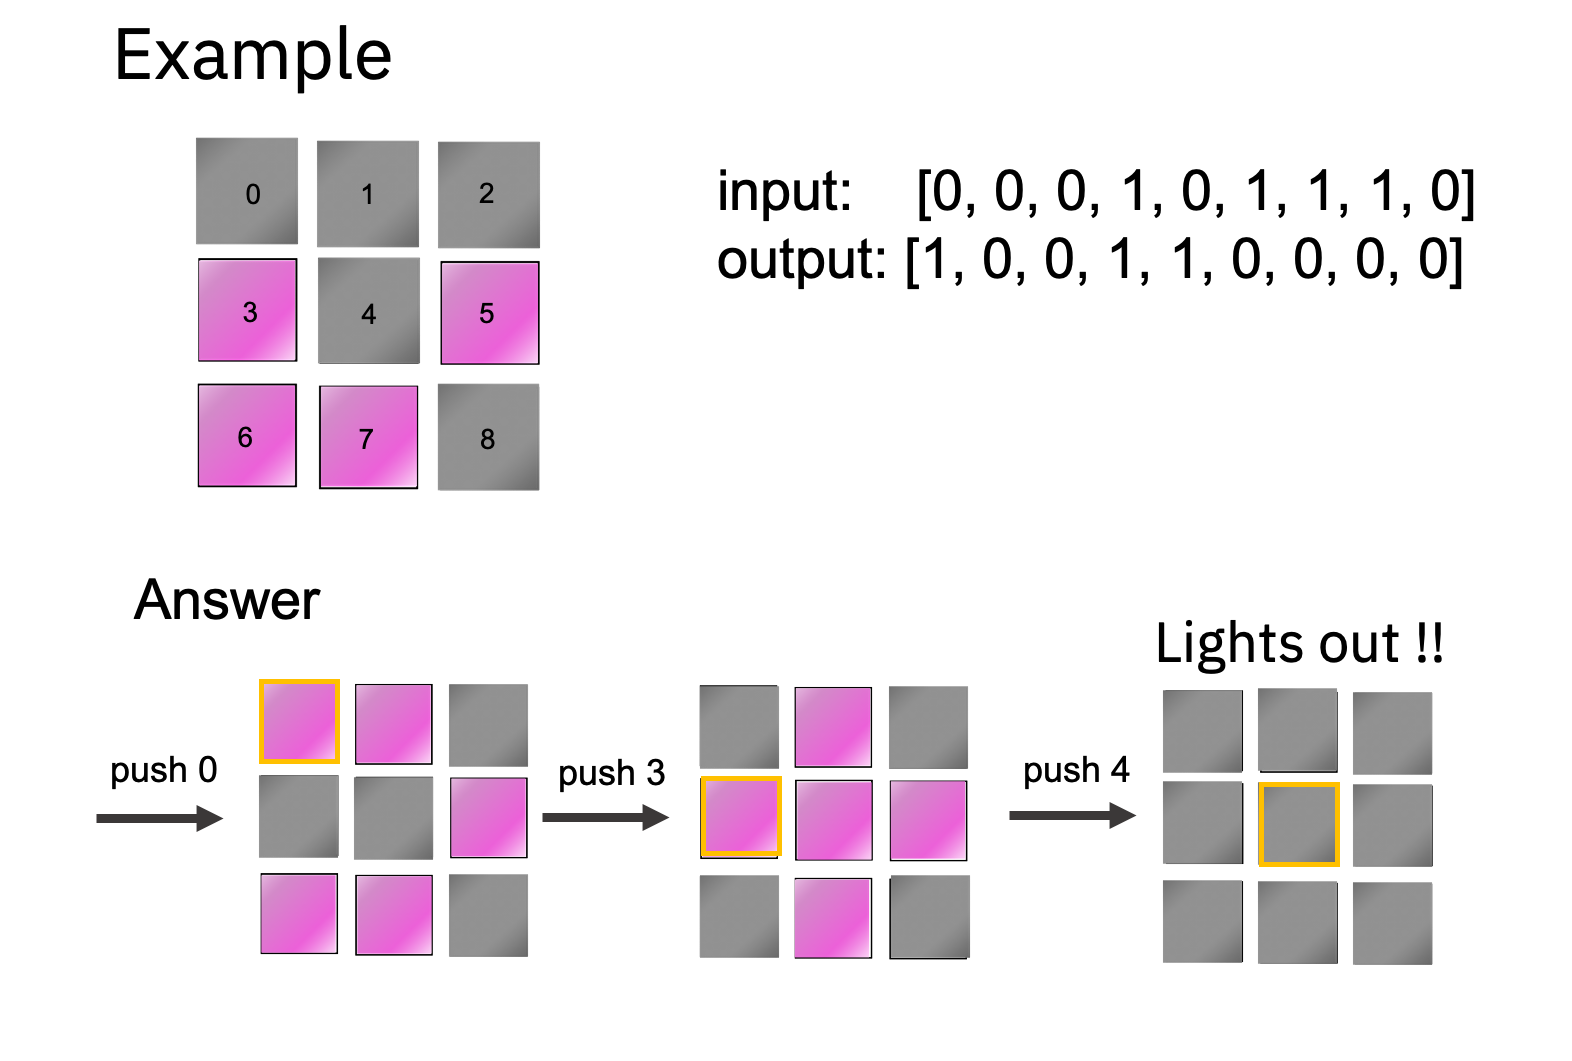

In [2]:
Image('lights_out_rule.png')

# Learning Exercise II-A

Let's try to solve a "Lights Out" puzzle using **Grover's algorithm**! The information you learned last week will be helpful in solving this puzzle.

Answer by creating a quantum circuit to solve the puzzle shown in the figure below. In the quantum circuit to be submitted, measure **only the `solution` (9bit)** that solves the puzzle. 
To submit your solution, create a function which takes `lights` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "lights". We will validate your circuit with different inputs.

**In addition, please implement the quantum circuit within 28 qubits.**

There are several ways to solve it without using Grover's algorithm, but we ask you to **use Grover's algorithm** for this exercise. It should help you in solving other challenges.

Please note that you can get the answer with the same endian as the one used in the description. You can also use the following function.
```python
qc = qc.reverse_bits()
```

# My submission

In [2]:
"""Creating a function that outputs the solution vector given any lights configuration"""
def week2a_ans_func(lights):
    from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
    def map_board(lights, qc, qreg):
        for i, yesno in enumerate(lights):
            if yesno == 1:
                qc.x(qreg[i])
    def initialize():
        map_board(lights, circ, inputs)
        circ.h(flip[:])
        circ.x(oracle[0])
        circ.h(oracle[0])
    def allzero(qc, tile, oracle):
        qc.x(tile[0:9])
        qc.mct(tile[0:9],oracle[0])
        qc.x(tile[0:9])
    def flip_tile(circ, flip, inputs):
        for x in range(9):
            target = []
            if x == 0:
                target = [0,1,3]
                circ.cx(flip[x],inputs[target])
            elif x == 1:
                target = [0,1,2,4]
                circ.cx(flip[x],inputs[target])
            elif x== 2:
                target = [1,2,5]
                circ.cx(flip[x],inputs[target])
            elif x == 3:
                target = [0,3,4,6]
                circ.cx(flip[x],inputs[target])
            elif x == 4:
                target = [1,3,4,5,7]
                circ.cx(flip[x],inputs[target])
            elif x == 5:
                target = [2,4,5,8]
                circ.cx(flip[x],inputs[target])
            elif x == 6:
                target = [3,6,7]
                circ.cx(flip[x],inputs[target])
            elif x == 7:
                target = [4,6,7,8]
                circ.cx(flip[x],inputs[target])
            elif x== 8:
                target = [5,7,8]
                circ.cx(flip[x],inputs[target])
    def diffuser(qc, nqubits):
        # Apply transformation |s> -> |00..0> (H-gates)
        for qubit in range(nqubits):
            qc.h(qubit)
        # Apply transformation |00..0> -> |11..1> (X-gates)
        for qubit in range(nqubits):
            qc.x(qubit)
        # Do multi-controlled-Z gate
        qc.h(nqubits-1)
        qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
        qc.h(nqubits-1)
        # Apply transformation |11..1> -> |00..0>
        for qubit in range(nqubits):
            qc.x(qubit)
        # Apply transformation |00..0> -> |s>
        for qubit in range(nqubits):
            qc.h(qubit)

    # Registers
    flip = QuantumRegister(9, 'sol')
    inputs = QuantumRegister(9, 'in')
    oracle = QuantumRegister(1, 'oracle')
    result = ClassicalRegister(9)
    circ = QuantumCircuit(flip, inputs, oracle, result)
    
    ##### build your quantum circuit here
    # INITIALIZE
    map_board(lights, circ, inputs)
    circ.h(flip[:])
    circ.x(oracle[0])
    circ.h(oracle[0])
    circ.barrier()
    for i in range(18):
        # Oracle -- entangling solution state with the all zero matrix, kicking back a global phase to inputs
        flip_tile(circ, flip, inputs)
        circ.barrier()
        allzero(circ, inputs, oracle)
        circ.barrier()
        # Applying oracle again to release any unnecessary entanglements and kicking global phase to sol to mark it
        flip_tile(circ, flip, inputs)
        circ.barrier()
        # Applying diffusion operator
        diffuser(circ, 9)
        circ.barrier()
    # Measurement
    circ.measure(flip, result)
    circ.barrier()
    # Make input same order as output
    circ = circ.reverse_bits()
    
    return circ

### Testing the circuit on the example board above

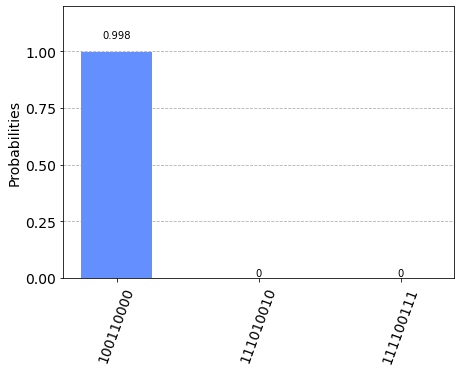

In [8]:
from qiskit import *
lightsConfig = [0,0,0,1,0,1,1,1,0]
circuit = week2a_ans_func(lightsConfig)

from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend=simulator, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)